In [1]:
import pandas as pd
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt



In [2]:
# Asegúrate de tener la ruta correcta y el nombre del archivo
ruta_archivo = 'C:/Users/yourk/Documents/8QT/AI/loan_data_ANN.xlsx'

# Cargar el archivo de Excel en un DataFrame
df = pd.read_excel(ruta_archivo)

# Mostrar los nombres de las columnas
print("Nombres de las columnas en el DataFrame:")
print(df.columns.tolist())

# Dividir los datos en entrenamiento y prueba
datos_entrenamiento = df.iloc[599:1200]  # Filas del 600 al 1200 para entrenamiento
datos_prueba = pd.concat([df.iloc[:599], df.iloc[1200:]])  # El resto para pruebas

Nombres de las columnas en el DataFrame:
['credit.policy', 'installment', 'fully.paid']


In [3]:
# Separa las características y las etiquetas
X_train = datos_entrenamiento.drop('installment', axis=1)
y_train = datos_entrenamiento['fully.paid']
X_test = datos_prueba.drop('installment', axis=1)
y_test = datos_prueba['fully.paid']

# Normalización de los datos (importante para el entrenamiento de redes neuronales)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [4]:
# Normalización de los datos (importante para el entrenamiento de redes neuronales)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


model = Sequential([
    Dense(12, activation='relu', input_shape=(X_train.shape[1],)),  # Única capa oculta con activación relu
    Dense(1, activation='sigmoid')  # Capa de salida con activación sigmoid
])

# Compilar el modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

C:\Users\yourk\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
# Entrenamiento del modelo
history = model.fit(X_train, y_train, epochs=100, batch_size=10, validation_data=(X_test, y_test),verbose=False)


Epoch 1/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.6188 - loss: 0.5431 - val_accuracy: 0.8456 - val_loss: 4.8309
Epoch 2/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.8392 - loss: 0.4159 - val_accuracy: 0.8410 - val_loss: 5.5155
Epoch 3/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9835 - loss: 0.2959 - val_accuracy: 0.8419 - val_loss: 6.0824
Epoch 4/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9955 - loss: 0.2400 - val_accuracy: 0.8432 - val_loss: 6.4643
Epoch 5/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 1.0000 - loss: 0.1639 - val_accuracy: 0.8452 - val_loss: 6.7620
Epoch 6/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 1.0000 - loss: 0.1263 - val_accuracy: 0.8469 - val_loss: 6.9516
Epoch 7/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 1.0000 - loss: 0.1029 - val_accuracy: 0.8481 - val_loss: 7.0521
Epoch 8/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 1.0000 - loss: 0.0693 - val_accuracy: 0.

In [6]:
# Evaluación del modelo
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Precisión del modelo: {accuracy * 100:.2f}%')


281/281 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9222 - loss: 2.6521
Precisión del modelo: 86.18%


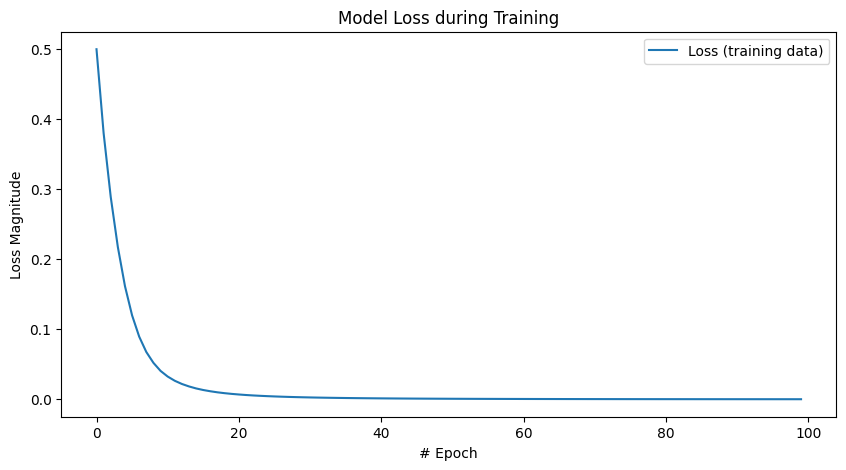

In [7]:


plt.figure(figsize=(10, 5))  
plt.plot(history.history['loss'], label='Loss (training data)')
plt.title('Model Loss during Training') 
plt.xlabel('# Epoch') 
plt.ylabel('Loss Magnitude') 
plt.legend()
plt.show()  